In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read in the public art data

In [29]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [30]:
art = art.drop(columns = ['Mapped Location'])
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 
                            'First Name': 'first_name', 'Location': 'loc', 
                            'Medium': 'medium',  'Type': 'art_type', 'Description': 'desc', 
                            'Latitude': 'lat', 'Longitude': 'lng'})

In [31]:
type_counts = art.art_type.value_counts()

In [32]:
#make series a df
type_counts = type_counts.to_frame()

#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()

In [33]:
type_counts.columns = ['art_type', 'count']
type_counts.head(3)

,art_type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


In [34]:
# map Frieze, Sculpture/Fountain, Fountain, and Relief to Sculpture
# map Street Art, mural to Mural
# map Bronzes to Monument

art.art_type = art.art_type.map({'Sculpture': 'Sculpture', 'Mural': 'Mural', 'Frieze': 'Sculpture',
             'Monument': 'Monument', 'Mobile': 'Mobile', 'Furniture': 'Furniture',
             'Mosaic': 'Mosaic', 'Relief': 'Sculpture', 'Stained Glass': 'Stained Glass',
             'Bronzes': 'Monument', 'Sculpture/Fountain': 'Sculpture',
             'Various': 'Various', 'Street Art': 'Street Art', 'mural': 'Mural',
             'Fountain': 'Sculpture', 'Multipart': 'Multipart'})
art.head(3)

,title,last_name,first_name,loc,medium,art_type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817


#### Make a horizontal barplot
 - using `matplotlib.pyplot`
 - using seaborn

#### matplotlib - https://matplotlib.org/gallery/index.html
#### seaborn - https://seaborn.pydata.org/examples/index.html


### Simplest horizontal barplot using matplotlib.pyplot

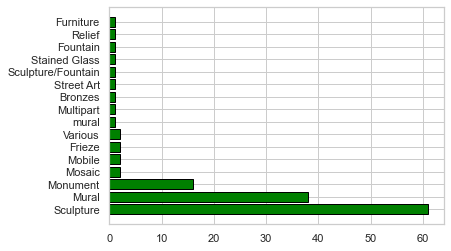

In [35]:
plt.barh('art_type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


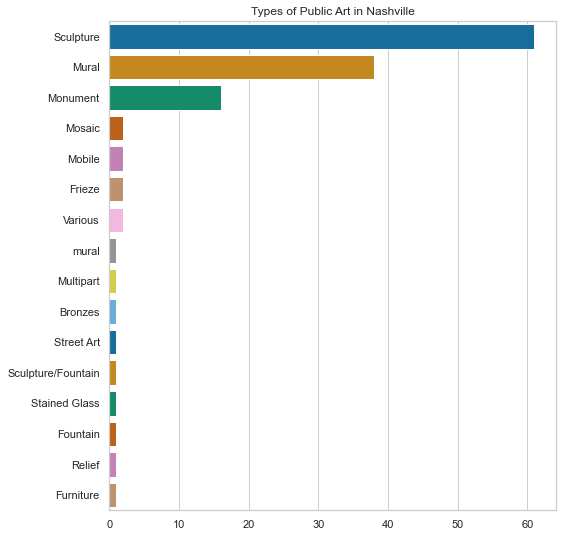

In [36]:
plt.figure(figsize = (8, 9))
sns.set(style="whitegrid")
sns.barplot('count', 'art_type', data = type_counts, palette = 'colorblind')
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Public Art in Nashville');

### Steps to create an aggregated dataset:
 1. Group by the columns you want to aggregate by with `df.groupby([col1, col2])`
 2. Use the `.agg()` function to get a count for groups
 3. Keep the desired columns / drop the ones you don't need  
 4. Rename columns (use `df.sort_values()` with `ascending = False` to put the largest value first
 

In [48]:
# aggregate to get counts by type and artist
aggregated_art = art.groupby(['art_type', 'last_name', 'first_name']).agg('count').reset_index()

In [49]:
aggregated_art.head(2)

,art_type,last_name,first_name,title,loc,medium,desc,lat,lng
0,Furniture,McGraw,Deloss,1,1,1,1,1,1
1,Mobile,Emery,Lin,1,1,1,1,1,1


#### Create a dataframe that aggregates the data by artist and gives a count of the number of works by the artist

In [39]:
aggregated_art = aggregated_art[['art_type', 'last_name', 'first_name', 'title']] 
aggregated_art.columns = ['art_type', 'last_name', 'first_name','art_count']
aggregated_art = aggregated_art.sort_values('art_count', ascending = False)
aggregated_art.head()

,art_type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


In [42]:
multiple_works = aggregated_art.loc[aggregated_art.art_count > 1]
multiple_works.shape

(15, 4)

In [41]:
multiple_works.head()

,art_type,last_name,first_name,art_count
40,Sculpture,Faxon,Russell,9
51,Sculpture,LeQuire,Alan,6
57,Sculpture,Mims,Puryear,6
29,Mural,Rudloff,Andee,6
17,Mural,Cooper,Michael,6


#### For loops 

In [51]:
last_names =  list(multiple_works.last_name)
first_names = list(multiple_works.first_name)

#### We can intialize an empty list and then build and append artists' full names in a for-loop 

In [52]:
artists=[]
for i in range(len(last_names)):
    artists.append(first_names[i] + ' ' + last_names[i])
artists               

['Russell Faxon',
 'Alan LeQuire',
 'Puryear Mims',
 'Andee Rudloff',
 'Michael Cooper',
 'Adrien Saporiti',
 'Belle and Leopold Kinney and Scholz',
 'George Julian Zolnay',
 'Various Various',
 'Bryan Deese',
 'Joe Sorci',
 'Livin Limor',
 'Unknown Unknown',
 'Lin Walker',
 'Alan LeQuire']

### Introduction to `iterrows()`

 - Our task: iterate through the `multiple_works` dataframe and print each artist and the number of works of a given type
 - `df.iterrows()` returns a tuple of row index and row values

In [ ]:
for index, row_values in multiple_works.iterrows():
    print('The index is ', index)
    print('The values are ', row_values)
    print('=========================')

In [ ]:
for index, row_values in multiple_works.iterrows():
    print(row_values['first_name'], row_values['last_name'], 'has',
         row_values['art_count'], 'public artworks of type', row_values['art_type'])
    


In [54]:
aggregated_art = art.groupby(['art_type', 'last_name', 'first_name']).agg('count')

In [56]:
for index, row_values in aggregated_art.iterrows():
    print('The index is ', index)
    print('The values are ', row_values)
    print('=========================')

The index is  ('Furniture', 'McGraw', 'Deloss')
The values are  title     1
loc       1
medium    1
desc      1
lat       1
lng       1
Name: (Furniture, McGraw, Deloss), dtype: int64
The index is  ('Mobile', 'Emery', 'Lin')
The values are  title     1
loc       1
medium    1
desc      1
lat       1
lng       1
Name: (Mobile, Emery, Lin), dtype: int64
The index is  ('Mobile', 'Outlaw', 'Adrienne')
The values are  title     1
loc       1
medium    1
desc      1
lat       1
lng       1
Name: (Mobile, Outlaw, Adrienne), dtype: int64
The index is  ('Monument', 'Faxon', 'Russell')
The values are  title     1
loc       1
medium    1
desc      1
lat       1
lng       1
Name: (Monument, Faxon, Russell), dtype: int64
The index is  ('Monument', 'Gelert and Cottrell', 'S. Johannes and W.L.')
The values are  title     1
loc       1
medium    1
desc      0
lat       1
lng       1
Name: (Monument, Gelert and Cottrell, S. Johannes and W.L.), dtype: int64
The index is  ('Monument', 'Grey', 'Jim')
The 